In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
#%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import hvplot.pandas
import holoviews as hv

In [2]:
from os import listdir
from os.path import isfile

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
dir = "../Resources/"

In [5]:
# Read all the files from the resources and put them in a list
all_files = [x for x in listdir(dir) if (".xlsx" in x or ".csv" in x)]
all_files

['corn.xlsx',
 'feeder_cattle.xlsx',
 'live_cattle.xlsx',
 'soybean_meal.xlsx',
 'lean_hogs.xlsx',
 'soybeans.xlsx']

In [6]:
all_df = pd.DataFrame()
for x in all_files:
    a = x.replace(".xlsx", "")
    df = pd.read_excel(dir+x)
    df["name"] = a
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date")
    df = df.sort_index()
    df = df.dropna()
    df = df[df['Volume'] != 0.0]
    df.drop(['Volume'], axis=1, inplace=True)
    if a == "corn":
        corn = df
        all_df["corn"] = corn["Price"]
    elif a == "live_cattle":
        live_cattle = df
        all_df["live_cattle"] = live_cattle["Price"]
    elif a == "feeder_cattle":
        feeder_cattle = df
        all_df["feeder_cattle"] = feeder_cattle["Price"]
    elif a == "soybean_meal":
        soybean_meal = df
        all_df["soybean_meal"] = soybean_meal["Price"]
    elif a == "lean_hogs":
        hog = df
        all_df["hog"] = hog["Price"]

In [7]:
all_df

corn  feeder_cattle  live_cattle  soybean_meal     hog
Date                                                                
2000-12-29  2.6175            NaN          NaN         176.3  47.500
2001-01-02  2.5825         89.875       77.150         176.4  47.800
2001-01-03  2.6100            NaN       76.900         175.2  47.150
2001-01-04  2.6100         89.500       76.650         173.8  48.000
2001-01-05  2.5800         89.500       76.300         171.7  48.000
2001-01-08  2.5800         89.150       75.800         172.3  48.300
2001-01-09  2.5925         89.200       76.375         174.2  48.275
2001-01-10  2.6150         89.625       76.575         172.9  47.800
2001-01-11  2.5625         89.700       76.600         170.0  47.875
2001-01-12  2.5425         89.500       76.225         169.9  47.850
2001-01-16  2.5150         89.250       76.225         166.3  47.900
2001-01-17  2.5125         88.950       75.825         165.9  48.750
2001-01-18  2.5300         88.750       75.550         166.5  48.400
2001-01-19  2.5375         88.675       75.500         164.5  48.600
2001-01-22  2.4900            NaN       75.450         165.8  48.800
2001-01-23  2.5100         88.000       74.900         163.5  48.400
2001-01-24  2.4950         88.325       75.000         163.8  48.450
2001-01-25  2.5000         88.150       74.600         162.8  48.950
2001-01-26  2.4800         87.975       74.500         160.0  49.750
2001-01-29  2.4500         87.900       74.125         159.0  49.950
2001-01-30  2.4525         86.850       73.650         159.9  49.975
2001-01-31  2.4600         87.050       74.125         161.1  50.425
2001-02-01  2.4425         88.100       74.875         160.9  50.975
2001-02-02  2.4700         87.600       74.550         162.7  50.950
2001-02-05  2.4900         88.225       75.150         160.3  50.900
2001-02-06  2.4725         88.400       75.275         161.4  50.900
2001-02-07  2.4900         88.200       74.925         160.8  50.750
2001-02-08  2.4650         88.250       74.675         158.0  50.850
2001-02-09  2.4500         88.300       75.050         157.5  50.750
2001-02-12  2.4450         88.075       74.900         156.9  50.575
...            ...            ...          ...           ...     ...
2021-09-23  5.2925        158.100      128.625         340.1  76.500
2021-09-24  5.2675        158.575      128.150         339.0  76.800
2021-09-27  5.3950        155.575      127.800         340.0  81.550
2021-09-28  5.3250        157.050      127.500         339.5  83.575
2021-09-29  5.3900        155.275      127.050         341.2  83.600
2021-09-30  5.3675        152.900      125.725         328.7  85.400
2021-10-01  5.4150        152.900      125.200         326.9  85.175
2021-10-04  5.4075        155.025      128.050         323.6  83.100
2021-10-05  5.3750        156.875      127.850         321.2  82.550
2021-10-06  5.3225        158.125      128.225         322.7  81.725
2021-10-07  5.3400        161.600      130.100         319.3  82.025
2021-10-08  5.3050        161.150      130.250         318.7  81.500
2021-10-11  5.3300        161.725      130.175         317.1  80.175
2021-10-12  5.2250        161.800      129.250         313.0  78.175
2021-10-13  5.1225        160.975      129.000         311.7  78.150
2021-10-14  5.1675        162.150      130.300         314.1  77.325
2021-10-15  5.2575        161.425      130.975         316.6  78.275
2021-10-18  5.3275        159.350      130.425         317.9  78.750
2021-10-19  5.3025        158.850      130.025         322.6  77.400
2021-10-20  5.3925        159.350      130.525         328.4  76.025
2021-10-21  5.3225        159.075      129.550         324.0  73.200
2021-10-22  5.3800        156.900      128.325         327.4  73.325
2021-10-25  5.3800        158.475      129.525         327.2  74.200
2021-10-26  5.4350        159.775      131.450         326.9  72.575
2021-10-27  5.5725        158.475      131.575         330.9  71.975
2021-10-28  

In [8]:
lh_df = all_df.drop(columns=["feeder_cattle", "live_cattle"])
lh_df.dropna(inplace=True)

In [9]:
lh_df['crush'] = lh_df['hog']*400*8 - (lh_df['corn']*5000*3 + lh_df['soybean_meal']*100)
lh_df

corn  soybean_meal     hog     crush
Date                                              
2000-12-29  2.6175         176.3  47.500   95107.5
2001-01-02  2.5825         176.4  47.800   96582.5
2001-01-03  2.6100         175.2  47.150   94210.0
2001-01-04  2.6100         173.8  48.000   97070.0
2001-01-05  2.5800         171.7  48.000   97730.0
2001-01-08  2.5800         172.3  48.300   98630.0
2001-01-09  2.5925         174.2  48.275   98172.5
2001-01-10  2.6150         172.9  47.800   96445.0
2001-01-11  2.5625         170.0  47.875   97762.5
2001-01-12  2.5425         169.9  47.850   97992.5
2001-01-16  2.5150         166.3  47.900   98925.0
2001-01-17  2.5125         165.9  48.750  101722.5
2001-01-18  2.5300         166.5  48.400  100280.0
2001-01-19  2.5375         164.5  48.600  101007.5
2001-01-22  2.4900         165.8  48.800  102230.0
2001-01-23  2.5100         163.5  48.400  100880.0
2001-01-24  2.4950         163.8  48.450  101235.0
2001-01-25  2.5000         162.8  48.950  102860.0
2001-01-26  2.4800         160.0  49.750  106000.0
2001-01-29  2.4500         159.0  49.950  107190.0
2001-01-30  2.4525         159.9  49.975  107142.5
2001-01-31  2.4600         161.1  50.425  108350.0
2001-02-01  2.4425         160.9  50.975  110392.5
2001-02-02  2.4700         162.7  50.950  109720.0
2001-02-05  2.4900         160.3  50.900  109500.0
2001-02-06  2.4725         161.4  50.900  109652.5
2001-02-07  2.4900         160.8  50.750  108970.0
2001-02-08  2.4650         158.0  50.850  109945.0
2001-02-09  2.4500         157.5  50.750  109900.0
2001-02-12  2.4450         156.9  50.575  109475.0
...            ...           ...     ...       ...
2021-09-23  5.2925         340.1  76.500  131402.5
2021-09-24  5.2675         339.0  76.800  132847.5
2021-09-27  5.3950         340.0  81.550  146035.0
2021-09-28  5.3250         339.5  83.575  153615.0
2021-09-29  5.3900         341.2  83.600  152550.0
2021-09-30  5.3675         328.7  85.400  159897.5
2021-10-01  5.4150         326.9  85.175  158645.0
2021-10-04  5.4075         323.6  83.100  152447.5
2021-10-05  5.3750         321.2  82.550  151415.0
2021-10-06  5.3225         322.7  81.725  149412.5
2021-10-07  5.3400         319.3  82.025  150450.0
2021-10-08  5.3050         318.7  81.500  149355.0
2021-10-11  5.3300         317.1  80.175  144900.0
2021-10-12  5.2250         313.0  78.175  140485.0
2021-10-13  5.1225         311.7  78.150  142072.5
2021-10-14  5.1675         314.1  77.325  138517.5
2021-10-15  5.2575         316.6  78.275  139957.5
2021-10-18  5.3275         317.9  78.750  140297.5
2021-10-19  5.3025         322.6  77.400  135882.5
2021-10-20  5.3925         328.4  76.025  129552.5
2021-10-21  5.3225         324.0  73.200  122002.5
2021-10-22  5.3800         327.4  73.325  121200.0
2021-10-25  5.3800         327.2  74.200  124020.0
2021-10-26  5.4350         326.9  72.575  118025.0
2021-10-27  5.5725         330.9  71.975  113642.5
2021-10-28  5.6275         330.9  75.200  123137.5
2021-10-29  5.6825         332.6  76.075  124942.5
2021-11-01  5.7900         329.1  76.150  123920.0
2021-11-02  5.7300         337.2  74.250  117930.0
2021-11-03  5.6400         340.8  75.950  124360.0

[5186 rows x 4 columns]

In [10]:
lh_df.hvplot(x='Date', y='crush')

:Curve   [Date]   (crush)

In [11]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
#lh_df['corn_scaled'] = scaler.fit(lh_df['corn'])

lh_df_std_scaled = std_scaler.fit_transform(lh_df.to_numpy())
lh_df_std_scaled = pd.DataFrame(lh_df_std_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

lh_df_std_scaled.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = StandardScaler()
#lh_df['corn_scaled'] = scaler.fit(lh_df['corn'])

lh_df_mm_scaled = mm_scaler.fit_transform(lh_df.to_numpy())
lh_df_mm_scaled = pd.DataFrame(lh_df_mm_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

lh_df_mm_scaled.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [13]:
lh_df_adj = lh_df.copy()
lh_df_adj['corn'] = lh_df['corn']*5000
lh_df_adj['soybean_meal'] = lh_df['soybean_meal']*100
lh_df_adj['hog'] = lh_df['hog']*400

lh_df_adj

corn  soybean_meal      hog     crush
Date                                                
2000-12-29  13087.5       17630.0  19000.0   95107.5
2001-01-02  12912.5       17640.0  19120.0   96582.5
2001-01-03  13050.0       17520.0  18860.0   94210.0
2001-01-04  13050.0       17380.0  19200.0   97070.0
2001-01-05  12900.0       17170.0  19200.0   97730.0
2001-01-08  12900.0       17230.0  19320.0   98630.0
2001-01-09  12962.5       17420.0  19310.0   98172.5
2001-01-10  13075.0       17290.0  19120.0   96445.0
2001-01-11  12812.5       17000.0  19150.0   97762.5
2001-01-12  12712.5       16990.0  19140.0   97992.5
2001-01-16  12575.0       16630.0  19160.0   98925.0
2001-01-17  12562.5       16590.0  19500.0  101722.5
2001-01-18  12650.0       16650.0  19360.0  100280.0
2001-01-19  12687.5       16450.0  19440.0  101007.5
2001-01-22  12450.0       16580.0  19520.0  102230.0
2001-01-23  12550.0       16350.0  19360.0  100880.0
2001-01-24  12475.0       16380.0  19380.0  101235.0
2001-01-25  12500.0       16280.0  19580.0  102860.0
2001-01-26  12400.0       16000.0  19900.0  106000.0
2001-01-29  12250.0       15900.0  19980.0  107190.0
2001-01-30  12262.5       15990.0  19990.0  107142.5
2001-01-31  12300.0       16110.0  20170.0  108350.0
2001-02-01  12212.5       16090.0  20390.0  110392.5
2001-02-02  12350.0       16270.0  20380.0  109720.0
2001-02-05  12450.0       16030.0  20360.0  109500.0
2001-02-06  12362.5       16140.0  20360.0  109652.5
2001-02-07  12450.0       16080.0  20300.0  108970.0
2001-02-08  12325.0       15800.0  20340.0  109945.0
2001-02-09  12250.0       15750.0  20300.0  109900.0
2001-02-12  12225.0       15690.0  20230.0  109475.0
...             ...           ...      ...       ...
2021-09-23  26462.5       34010.0  30600.0  131402.5
2021-09-24  26337.5       33900.0  30720.0  132847.5
2021-09-27  26975.0       34000.0  32620.0  146035.0
2021-09-28  26625.0       33950.0  33430.0  153615.0
2021-09-29  26950.0       34120.0  33440.0  152550.0
2021-09-30  26837.5       32870.0  34160.0  159897.5
2021-10-01  27075.0       32690.0  34070.0  158645.0
2021-10-04  27037.5       32360.0  33240.0  152447.5
2021-10-05  26875.0       32120.0  33020.0  151415.0
2021-10-06  26612.5       32270.0  32690.0  149412.5
2021-10-07  26700.0       31930.0  32810.0  150450.0
2021-10-08  26525.0       31870.0  32600.0  149355.0
2021-10-11  26650.0       31710.0  32070.0  144900.0
2021-10-12  26125.0       31300.0  31270.0  140485.0
2021-10-13  25612.5       31170.0  31260.0  142072.5
2021-10-14  25837.5       31410.0  30930.0  138517.5
2021-10-15  26287.5       31660.0  31310.0  139957.5
2021-10-18  26637.5       31790.0  31500.0  140297.5
2021-10-19  26512.5       32260.0  30960.0  135882.5
2021-10-20  26962.5       32840.0  30410.0  129552.5
2021-10-21  26612.5       32400.0  29280.0  122002.5
2021-10-22  26900.0       32740.0  29330.0  121200.0
2021-10-25  26900.0       32720.0  29680.0  124020.0
2021-10-26  27175.0       32690.0  29030.0  118025.0
2021-10-27  27862.5       33090.0  28790.0  113642.5
2021-10-28  28137.5       33090.0  30080.0  123137.5
2021-10-29  28412.5       33260.0  30430.0  124942.5
2021-11-01  28950.0       32910.0  30460.0  123920.0
2021-11-02  28650.0       33720.0  29700.0  117930.0
2021-11-03  28200.0       34080.0  30380.0  124360.0

[5186 rows x 4 columns]

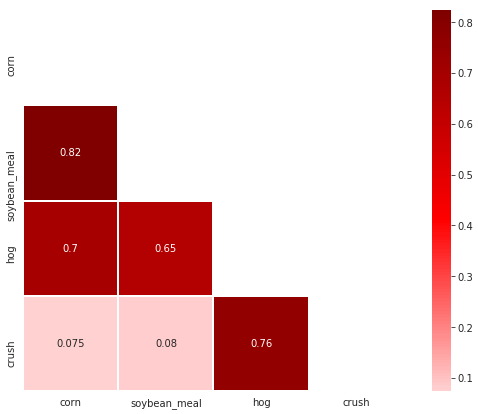

In [14]:
corrM = lh_df_adj.corr()

mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
# OLS
lr_features = lh_df_adj.drop(axis=1, columns=["crush", "hog"])
lr_model = LinearRegression()

X = lr_features
y = (lh_df_adj['hog']*8).to_frame()
lr_model.fit(X, y)
test = X

predictions = lr_model.predict(X)
predictions

# Calculate r2_score (r-squared)
r2 = r2_score(y, predictions)

# Calculate mean squared error 
mse = mean_squared_error(y, predictions)

# Using mean squared error above, calculate root-mean-squared error (RMSE)
rmse = np.sqrt(mse)

# Print the r2, mser, rmse, and standard deviation
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

# with statsmodels print detailed reults

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

R-squared (R2 ): 0.5074272220823359
Mean Squared Error (MSE): 820644247.0670722
Root Mean Squared Error (RMSE): 28646.88895965969
Standard Deviation: hog    40817.110884
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    hog   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     2670.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:07:00   Log-Likelihood:                -60581.
No. Observations:                5186   AIC:                         1.212e+05
Df Residuals:                    5183   BIC:                         1.212e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef  

In [16]:
lh_df_adj_totals = lh_df_adj.copy()
lh_df_adj_totals['corn'] = lh_df_adj_totals['corn']*3
lh_df_adj_totals['hog'] = lh_df_adj_totals['hog']*8
lh_df_adj_totals['soybean_meal'] = lh_df_adj_totals['soybean_meal']*1
lh_df_adj_totals['corn + soybean_meal'] = lh_df_adj_totals['corn'] + lh_df_adj_totals['soybean_meal']
lh_df_adj_totals

corn  soybean_meal       hog     crush  corn + soybean_meal
Date                                                                      
2000-12-29  39262.5       17630.0  152000.0   95107.5              56892.5
2001-01-02  38737.5       17640.0  152960.0   96582.5              56377.5
2001-01-03  39150.0       17520.0  150880.0   94210.0              56670.0
2001-01-04  39150.0       17380.0  153600.0   97070.0              56530.0
2001-01-05  38700.0       17170.0  153600.0   97730.0              55870.0
2001-01-08  38700.0       17230.0  154560.0   98630.0              55930.0
2001-01-09  38887.5       17420.0  154480.0   98172.5              56307.5
2001-01-10  39225.0       17290.0  152960.0   96445.0              56515.0
2001-01-11  38437.5       17000.0  153200.0   97762.5              55437.5
2001-01-12  38137.5       16990.0  153120.0   97992.5              55127.5
2001-01-16  37725.0       16630.0  153280.0   98925.0              54355.0
2001-01-17  37687.5       16590.0  156000.0  101722.5              54277.5
2001-01-18  37950.0       16650.0  154880.0  100280.0              54600.0
2001-01-19  38062.5       16450.0  155520.0  101007.5              54512.5
2001-01-22  37350.0       16580.0  156160.0  102230.0              53930.0
2001-01-23  37650.0       16350.0  154880.0  100880.0              54000.0
2001-01-24  37425.0       16380.0  155040.0  101235.0              53805.0
2001-01-25  37500.0       16280.0  156640.0  102860.0              53780.0
2001-01-26  37200.0       16000.0  159200.0  106000.0              53200.0
2001-01-29  36750.0       15900.0  159840.0  107190.0              52650.0
2001-01-30  36787.5       15990.0  159920.0  107142.5              52777.5
2001-01-31  36900.0       16110.0  161360.0  108350.0              53010.0
2001-02-01  36637.5       16090.0  163120.0  110392.5              52727.5
2001-02-02  37050.0       16270.0  163040.0  109720.0              53320.0
2001-02-05  37350.0       16030.0  162880.0  109500.0              53380.0
2001-02-06  37087.5       16140.0  162880.0  109652.5              53227.5
2001-02-07  37350.0       16080.0  162400.0  108970.0              53430.0
2001-02-08  36975.0       15800.0  162720.0  109945.0              52775.0
2001-02-09  36750.0       15750.0  162400.0  109900.0              52500.0
2001-02-12  36675.0       15690.0  161840.0  109475.0              52365.0
...             ...           ...       ...       ...                  ...
2021-09-23  79387.5       34010.0  244800.0  131402.5             113397.5
2021-09-24  79012.5       33900.0  245760.0  132847.5             112912.5
2021-09-27  80925.0       34000.0  260960.0  146035.0             114925.0
2021-09-28  79875.0       33950.0  267440.0  153615.0             113825.0
2021-09-29  80850.0       34120.0  267520.0  152550.0             114970.0
2021-09-30  80512.5       32870.0  273280.0  159897.5             113382.5
2021-10-01  81225.0       32690.0  272560.0  158645.0             113915.0
2021-10-04  81112.5       32360.0  265920.0  152447.5             113472.5
2021-10-05  80625.0       32120.0  264160.0  151415.0             112745.0
2021-10-06  79837.5       32270.0  261520.0  149412.5             112107.5
2021-10-07  80100.0       31930.0  262480.0  150450.0             112030.0
2021-10-08  79575.0       31870.0  260800.0  149355.0             111445.0
2021-10-11  79950.0       31710.0  256560.0  144900.0             111660.0
2021-10-12  78375.0       31300.0  250160.0  140485.0             109675.0
2021-10-13  76837.5       31170.0  250080.0  142072.5             108007.5
2021-10-14  77512.5       31410.0  247440.0  138517.5             108922.5
2021-10-15  78862.5       31660.0  250480.0  139957.5             110522.5
2021-10-18  79912.5       31790.0  252000.0  140297.5             111702.5
2021-10-19  79537.5       32260.0  247680.0  135882.5             111797.5
2021-10-20  80887.5       32840.0  243280.0  129552.5             113727.5
2021-10-21  79837.5       32400.0  23424

In [17]:
lh_df_adj_totals.hvplot(x='Date', y=['hog', 'corn + soybean_meal'])

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [18]:
mean_line = hv.HLine(lh_df['crush'].mean())
mean_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
plot = lh_df.hvplot(x='Date', y='crush', yformatter='%.0f')
plot * mean_line

:Overlay
   .Curve.I :Curve   [Date]   (crush)
   .HLine.I :HLine   [x,y]

In [19]:
# Plot z-scores of the ratio

def zscore(series):
    return (series - series.mean()) / np.std(series)

lh_df['Z-Score'] = zscore(lh_df['crush'])

zscore_plot = lh_df.hvplot(x='Date', y=['Z-Score'])
z_zero_line = hv.HLine(0)
z_zero_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
z_plus_one = hv.HLine(1)
z_plus_one.opts(color = 'orange', line_dash = 'dashed', line_width=2.0)
z_minus_one = hv.HLine(-1)
z_minus_one.opts(color = 'green', line_dash = 'dashed', line_width=2.0)
z_plus_two = hv.HLine(2)
z_plus_two.opts(color = 'red', line_dash = 'dashed', line_width=2.0)
z_minus_two = hv.HLine(-2)
z_minus_two.opts(color = 'purple', line_dash = 'dashed', line_width=2.0)

zscore_plot * z_zero_line * z_plus_one * z_minus_one * z_plus_two * z_minus_two

:Overlay
   .Curve.I   :Curve   [Date]   (Z-Score)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]
   .HLine.IV  :HLine   [x,y]
   .HLine.V   :HLine   [x,y]

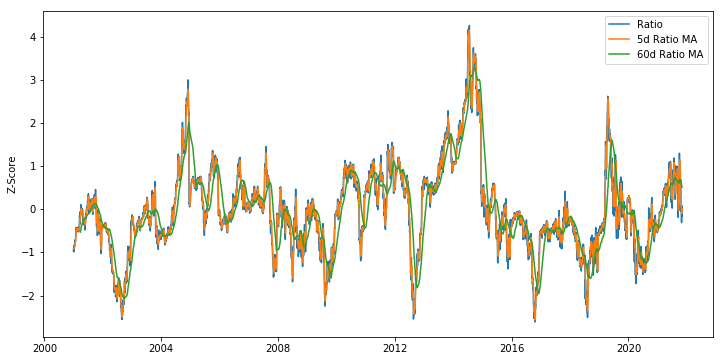

In [20]:
# Feature Engineering for training
train = lh_df.copy()
feature_train = train['Z-Score']

ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
std_60 = feature_train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(feature_train.index, feature_train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Z-Score')
    
plt.show()

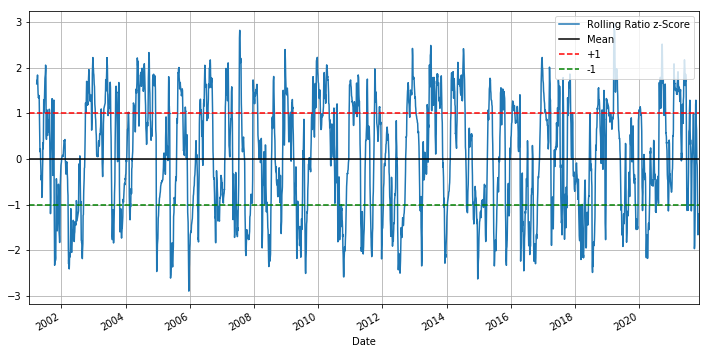

In [21]:
plt.figure(figsize=(12,6))
zscore_60_5.plot(grid=True)
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

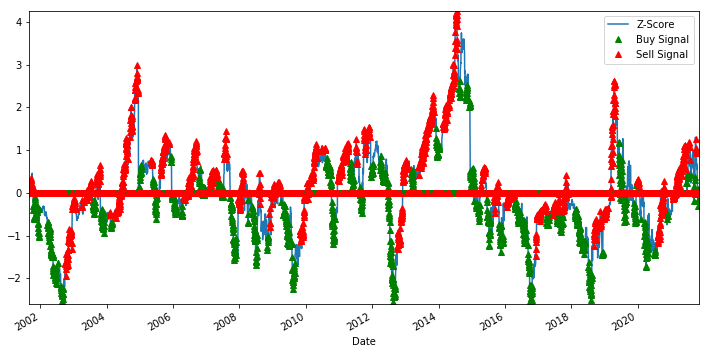

In [22]:
plt.figure(figsize=(12,6))

feature_train[160:].plot()
buy = feature_train.copy()
sell = feature_train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, train['Z-Score'].min(), train['Z-Score'].max()))
plt.legend(['Z-Score', 'Buy Signal', 'Sell Signal'])
plt.show()

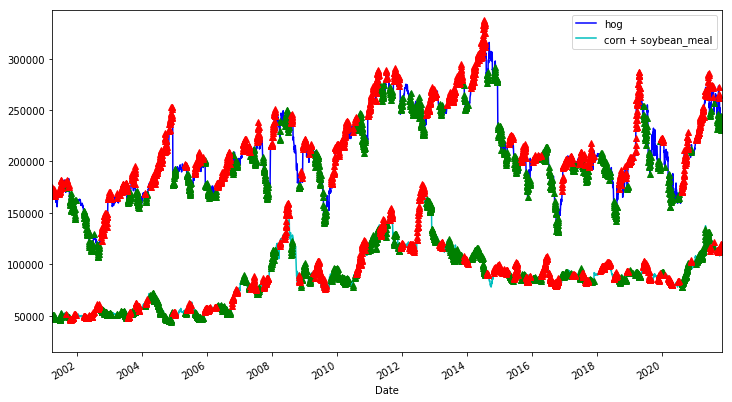

In [23]:
plt.figure(figsize=(12,7))
S1 = lh_df_adj_totals['hog']
S2 = lh_df_adj_totals['corn + soybean_meal']

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy x and sell y
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell x and buy y
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min())-30000, max(S1.max(), S2.max())+10000))

plt.legend(['hog', 'corn + soybean_meal'])
plt.show()

In [24]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    
    # intiliazae trading results dataframe
    trading_results = pd.DataFrame(index=S1.index, columns=['equity', 'ratios', 'countS1', 'countS2'])
    
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            trading_results['equity'][i] = money
            trading_results['ratios'][i] = ratios[i]
            trading_results['countS1'][i] = countS1
            trading_results['countS2'][i] = countS2
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money, trading_results

In [25]:
# Run the trading similuation and visualize the equity curve

train_total_equity, train_trading_results = trade(lh_df_adj_totals['hog'], lh_df_adj_totals['corn + soybean_meal'], 60, 5)
train_trading_results_plot = train_trading_results.dropna().hvplot(x='Date', y=['equity'], yformatter='%.0f')
train_trading_results_plot

:Curve   [Date]   (equity)